# Predicting the final grade of a student

The data used is from a Portuguese secondary school. The data includes academic and personal characteristics of the students as well as final grades. The task is to predict the final grade from the student information. (Regression)

### [Link to dataset](https://archive.ics.uci.edu/ml/datasets/student+performance)


### Import the relevant modules

In [40]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np

In [41]:
# Standard ML Models for comparison
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import ElasticNet
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.svm import SVR

# Splitting data into training/testing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

# Metrics
from sklearn.metrics import mean_squared_error, mean_absolute_error, median_absolute_error

# Distributions
import scipy

In [77]:
student = pd.read_csv('student-mat.csv')
student.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


# Some basic analysis

In [78]:
print('Total number of students:',len(student))

Total number of students: 395


## Checking the final grade

In [79]:
student['G3'].describe()

count    395.000000
mean      10.415190
std        4.581443
min        0.000000
25%        8.000000
50%       11.000000
75%       14.000000
max       20.000000
Name: G3, dtype: float64

### Grades according to the number of students who scored them

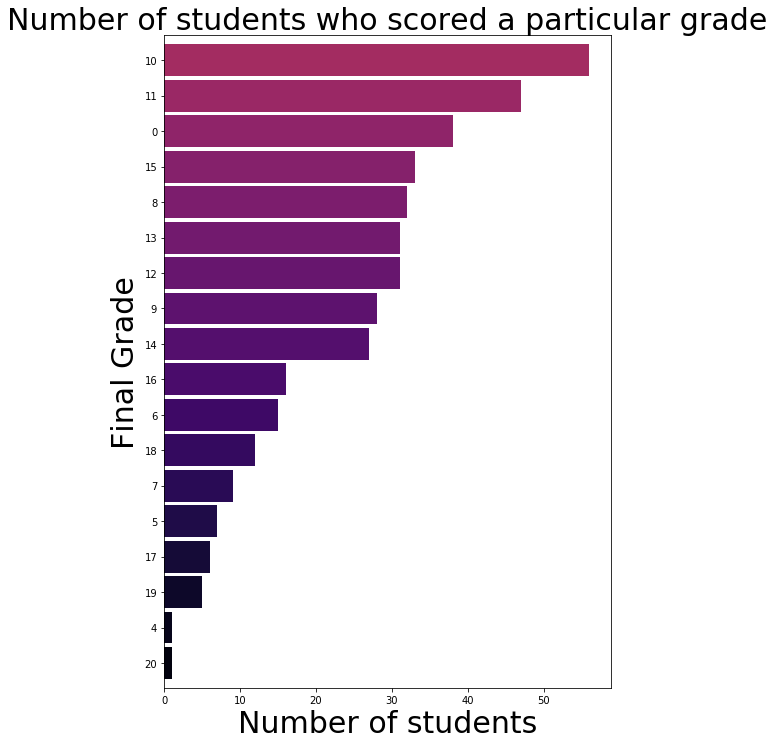

In [80]:
plt.subplots(figsize=(8,12))
grade_counts = student['G3'].value_counts().sort_values().plot.barh(width=.9,color=sns.color_palette('inferno',40))
grade_counts.axes.set_title('Number of students who scored a particular grade',fontsize=30)
grade_counts.set_xlabel('Number of students', fontsize=30)
grade_counts.set_ylabel('Final Grade', fontsize=30)
plt.show()



This plot does not tell us much. What we should really plot is the distribution of grade.



# Final grade distribution

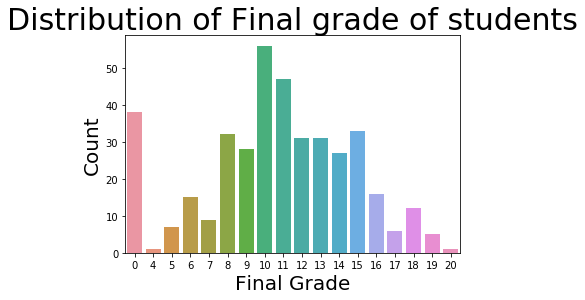

In [81]:
b = sns.countplot(student['G3'])
b.axes.set_title('Distribution of Final grade of students', fontsize = 30)
b.set_xlabel('Final Grade', fontsize = 20)
b.set_ylabel('Count', fontsize = 20)
plt.show()

## Hmmmmm!

Something seems off here. Apart from the high number of students scoring 0, the distribution is normal as expected.
Maybe the value 0 is used in place of null. Or maybe the students who did not appear for the exam, or were not allowed to sit for the exam due to some reason are marked as 0. We cannot be sure. Let us check the table for null values

In [82]:
student.isnull().any()

school        False
sex           False
age           False
address       False
famsize       False
Pstatus       False
Medu          False
Fedu          False
Mjob          False
Fjob          False
reason        False
guardian      False
traveltime    False
studytime     False
failures      False
schoolsup     False
famsup        False
paid          False
activities    False
nursery       False
higher        False
internet      False
romantic      False
famrel        False
freetime      False
goout         False
Dalc          False
Walc          False
health        False
absences      False
G1            False
G2            False
G3            False
dtype: bool

### None of the variables has null values so maybe grade 0 does not mean null after all

## Next let us take a look at the gender variable

In [83]:
male_studs = len(student[student['sex'] == 'M'])
female_studs = len(student[student['sex'] == 'F'])
print('Number of male students:',male_studs)
print('Number of female students:',female_studs)

Number of male students: 187
Number of female students: 208


## Checking the distribution of Age along with gender

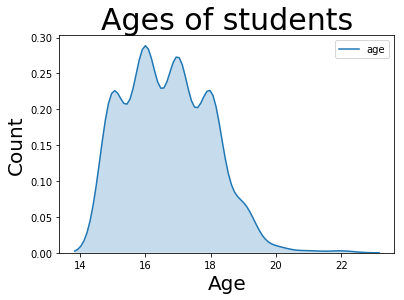

In [84]:
b = sns.kdeplot(student['age'], shade=True)
b.axes.set_title('Ages of students', fontsize = 30)
b.set_xlabel('Age', fontsize = 20)
b.set_ylabel('Count', fontsize = 20)
plt.show()

### Histogram might be more useful to compare different ages

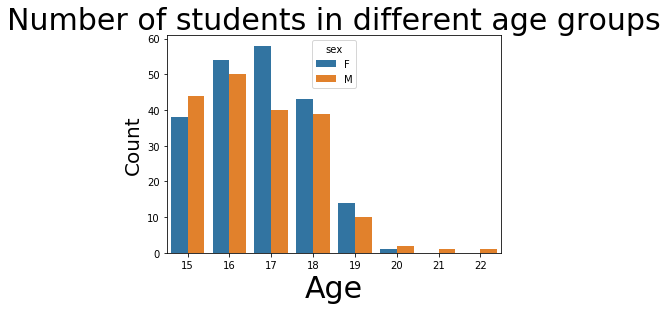

In [85]:
b = sns.countplot('age',hue='sex', data=student)
b.axes.set_title('Number of students in different age groups',fontsize=30)
b.set_xlabel("Age",fontsize=30)
b.set_ylabel("Count",fontsize=20)
plt.show()

The ages seem to be ranging from 15 - 19. The students above that age may not necessarily be outliers but students with year drops. Also the gender distribution is pretty even.

## Does age have anything to do with the final grade?

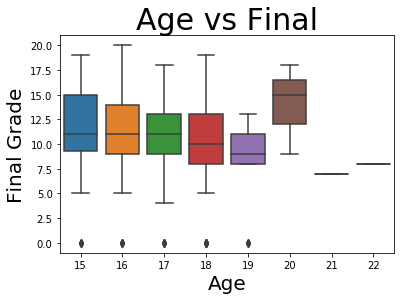

In [86]:
b = sns.boxplot(x='age', y='G3', data=student)
b.axes.set_title('Age vs Final', fontsize = 30)
b.set_xlabel('Age', fontsize = 20)
b.set_ylabel('Final Grade', fontsize = 20)
plt.show()

### Plotting the distribution rather than statistics would help us better understand the data

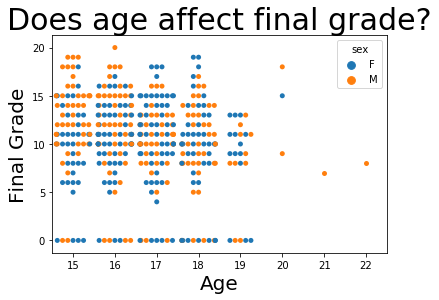

In [87]:
b = sns.swarmplot(x='age', y='G3',hue='sex', data=student)
b.axes.set_title('Does age affect final grade?', fontsize = 30)
b.set_xlabel('Age', fontsize = 20)
b.set_ylabel('Final Grade', fontsize = 20)
plt.show()

We see that age 20 has only 3 data points hence the inconsistency in statistics. Otherwise there seems to be no clear relation of age or gender with final grade

## Count of students from urban and rural areas

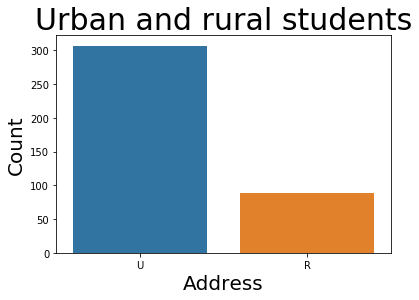

In [88]:
b = sns.countplot(student['address'])
b.axes.set_title('Urban and rural students', fontsize = 30)
b.set_xlabel('Address', fontsize = 20)
b.set_ylabel('Count', fontsize = 20)
plt.show()

## Most students are from urban ares, but do urban students perform better than rurual students?

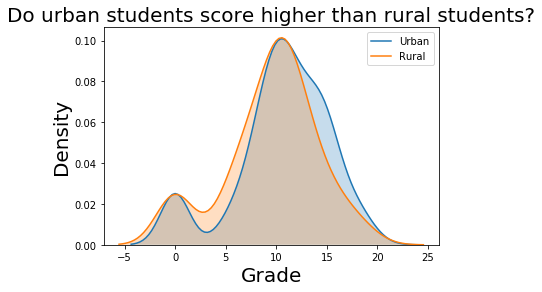

In [89]:
# Grade distribution by address
sns.kdeplot(student.loc[student['address'] == 'U', 'G3'], label='Urban', shade = True)
sns.kdeplot(student.loc[student['address'] == 'R', 'G3'], label='Rural', shade = True)
plt.title('Do urban students score higher than rural students?', fontsize = 20)
plt.xlabel('Grade', fontsize = 20);
plt.ylabel('Density', fontsize = 20)
plt.show()

The graph shows that on there is not much difference between the scores based on location.

## Reason to choose this school

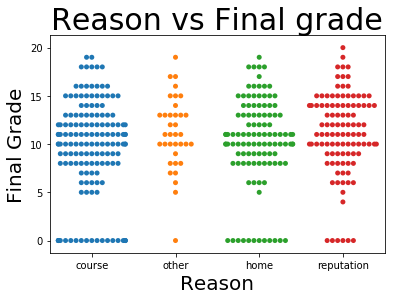

In [90]:
b = sns.swarmplot(x='reason', y='G3', data=student)
b.axes.set_title('Reason vs Final grade', fontsize = 30)
b.set_xlabel('Reason', fontsize = 20)
b.set_ylabel('Final Grade', fontsize = 20)
plt.show()

## Other features

It might not be wise to analyse every feature so we will find the features most correlated to the final grade and spend more time on them.

## Correlation

Next we find the correlation between various features and the final grade.
 
### Note: This correlation is only between numeric values

In [91]:
student.corr()['G3'].sort_values()

failures     -0.360415
age          -0.161579
goout        -0.132791
traveltime   -0.117142
health       -0.061335
Dalc         -0.054660
Walc         -0.051939
freetime      0.011307
absences      0.034247
famrel        0.051363
studytime     0.097820
Fedu          0.152457
Medu          0.217147
G1            0.801468
G2            0.904868
G3            1.000000
Name: G3, dtype: float64

# Encoding categorical variables

A machine learning model cannot deal with categorical variables (except for some models). Therefore we need to find a way to encode them (represent as numbers) before handing them to the model.

## Label encoding

This method involves assigning one label for each category

| Occupation    | Label         |
| ------------- |:-------------:|
| programmer    | 0             |
| data scientist| 1             |
| Engineer      | 2             |



The problem with label encoding is that the assignment of integers is random and changes every time we run the function. Also the model might give higher priority to larger labels. Label encoding can be used when we have only 2 unique values.

## One hot encoding

The problem with label encoding is solved by one hot encoding. It creates a new column for each category and uses only binary values. The downside of one hot encoding is that the number of features can explode if the categorical variables have many categories. To deal with this we can perform PCA (or other dimensionality reduction methods) followed by one hot encoding.

| Occupation    | Occupation_prog| Occupation_ds | Occupation_eng |
| ------------- |:-------------: |:-------------:|:-------------: |
| programmer    | 1              | 0             | 0              |
| data scientist| 0              | 1             | 0              |
| Engineer      | 0              | 0             | 1              |

### Example of one hot encoding

In [92]:
# Select only categorical variables
category_df = student.select_dtypes(include=['object'])

# One hot encode the variables
dummy_df = pd.get_dummies(category_df)

# Put the grade back in the dataframe
dummy_df['G3'] = student['G3']

# Find correlations with grade
dummy_df.corr()['G3'].sort_values()

higher_no           -0.182465
romantic_yes        -0.129970
Mjob_at_home        -0.115634
address_R           -0.105756
sex_F               -0.103456
paid_no             -0.101996
reason_course       -0.098950
internet_no         -0.098483
Mjob_other          -0.096477
guardian_other      -0.087774
schoolsup_yes       -0.082788
famsize_GT3         -0.081407
Pstatus_T           -0.058009
Fjob_other          -0.053483
nursery_no          -0.051568
school_MS           -0.045017
famsup_yes          -0.039157
reason_home         -0.021359
Fjob_services       -0.016108
activities_no       -0.016100
Fjob_at_home        -0.013385
activities_yes       0.016100
guardian_mother      0.022338
guardian_father      0.032493
famsup_no            0.039157
school_GP            0.045017
nursery_yes          0.051568
reason_other         0.052008
Fjob_health          0.057111
Mjob_teacher         0.057712
Pstatus_A            0.058009
Mjob_services        0.078429
famsize_LE3          0.081407
schoolsup_

## Applying one hot encoding to our data and finding correlation again!


### Note: 
Although G1 and G2 which are period grades of a student and are highly correlated to the final grade G3, we drop them. It is more difficult to predict G3 without G2 and G1, but such prediction is much more useful because we want to find other factors affect the grade.

In [93]:
# selecting the most correlated values and dropping the others
labels = student['G3']

# drop the school and grade columns
student = student.drop(['school', 'G1', 'G2'], axis='columns')
    
# One-Hot Encoding of Categorical Variables
student = pd.get_dummies(student)

In [94]:
# Find correlations with the Grade
most_correlated = student.corr().abs()['G3'].sort_values(ascending=False)

# Maintain the top 8 most correlation features with Grade
most_correlated = most_correlated[:9]
most_correlated

G3             1.000000
failures       0.360415
Medu           0.217147
higher_yes     0.182465
higher_no      0.182465
age            0.161579
Fedu           0.152457
goout          0.132791
romantic_no    0.129970
Name: G3, dtype: float64

In [95]:
student = student.loc[:, most_correlated.index]
student.head()

,G3,failures,Medu,higher_yes,higher_no,age,Fedu,goout,romantic_no
0,6,0,4,1,0,18,4,4,1
1,6,0,1,1,0,17,1,3,1
2,10,3,1,1,0,15,1,2,1
3,15,0,4,1,0,15,2,2,0
4,10,0,3,1,0,16,3,2,1


# Now we will analyse these variables and then train a model

### Student with less previous failures usually score higher

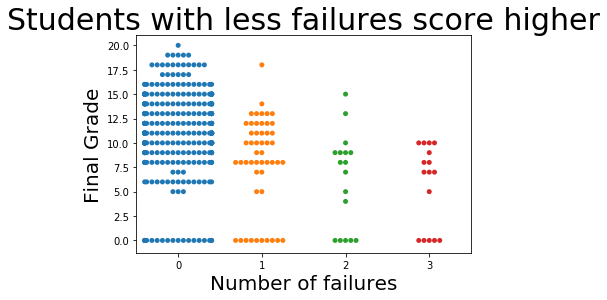

In [96]:
b = sns.swarmplot(x=student['failures'],y=student['G3'])
b.axes.set_title('Students with less failures score higher', fontsize = 30)
b.set_xlabel('Number of failures', fontsize = 20)
b.set_ylabel('Final Grade', fontsize = 20)
plt.show()

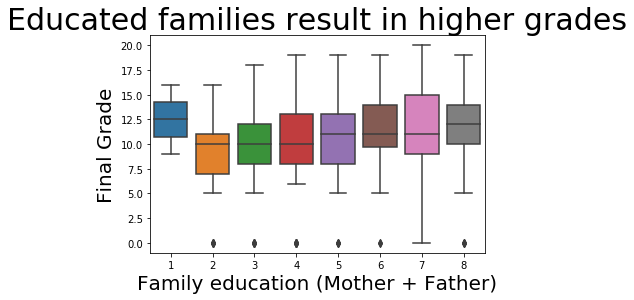

In [97]:
family_ed = student['Fedu'] + student['Medu'] 
b = sns.boxplot(x=family_ed,y=student['G3'])
b.axes.set_title('Educated families result in higher grades', fontsize = 30)
b.set_xlabel('Family education (Mother + Father)', fontsize = 20)
b.set_ylabel('Final Grade', fontsize = 20)
plt.show()

There seems to be a slight trend that with the increase in family education the grade moves up (apart from the unusual high value at family_ed = 1 (maybe students whose parents did not get to study have more motivation)

### Note:

I prefer swarm plots over box plots because it is much more useful to see the distribution of data (and also to spot outliers)

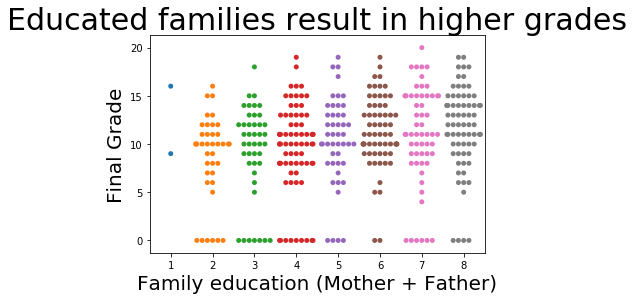

In [98]:
b = sns.swarmplot(x=family_ed,y=student['G3'])
b.axes.set_title('Educated families result in higher grades', fontsize = 30)
b.set_xlabel('Family education (Mother + Father)', fontsize = 20)
b.set_ylabel('Final Grade', fontsize = 20)
plt.show()

As we can see there are only 2 points in family_ed = 1 hence our conclusion was faulty.

## Higher education

Higher education was a categorical variable with values yes and no. Since we used one hot encoding it has been converted to 2 variables. So we can safely eliminate one of them (since the values are compliments of each other). We will eliminate higher_no, since higher_yes is more intuitive.

In [99]:
student = student.drop('higher_no', axis='columns')
student.head()

,G3,failures,Medu,higher_yes,age,Fedu,goout,romantic_no
0,6,0,4,1,18,4,4,1
1,6,0,1,1,17,1,3,1
2,10,3,1,1,15,1,2,1
3,15,0,4,1,15,2,2,0
4,10,0,3,1,16,3,2,1


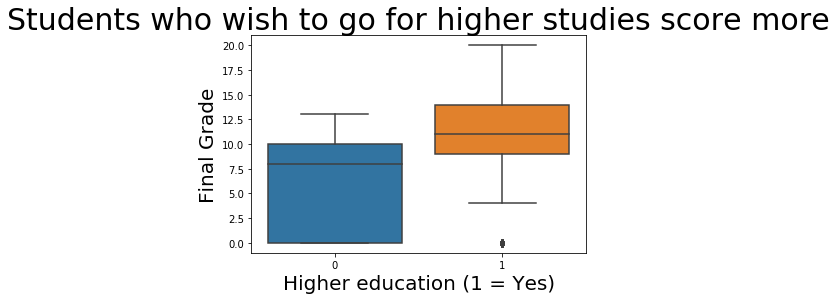

In [102]:
b = sns.boxplot(x = student['higher_yes'], y=student['G3'])
b.axes.set_title('Students who wish to go for higher studies score more', fontsize = 30)
b.set_xlabel('Higher education (1 = Yes)', fontsize = 20)
b.set_ylabel('Final Grade', fontsize = 20)
plt.show()

### Going out with friends

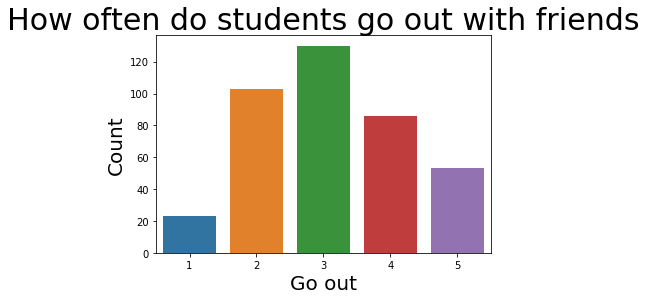

In [103]:
b = sns.countplot(student['goout'])
b.axes.set_title('How often do students go out with friends', fontsize = 30)
b.set_xlabel('Go out', fontsize = 20)
b.set_ylabel('Count', fontsize = 20)
plt.show()

Most students have an average score when it comes to going out with friends. (normal distribution)

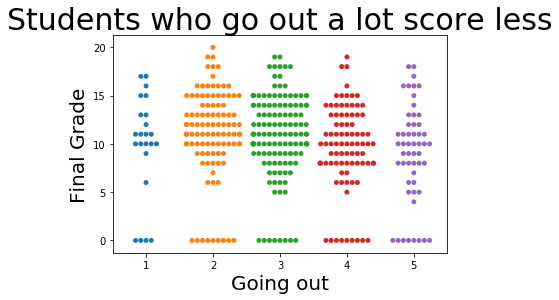

In [104]:
b = sns.swarmplot(x=student['goout'],y=student['G3'])
b.axes.set_title('Students who go out a lot score less', fontsize = 30)
b.set_xlabel('Going out', fontsize = 20)
b.set_ylabel('Final Grade', fontsize = 20)
plt.show()

The graph shows a slight downward trend

## Does having a romantic relationship affect grade?

Again because of one hot encoding we have our variable called romantic_no which is slightly less intuitive but I am going to stick with it. Keep in mind that:

- romantic_no = 1 means NO romantic relationship
- romantic_no = 0 means romantic relationship

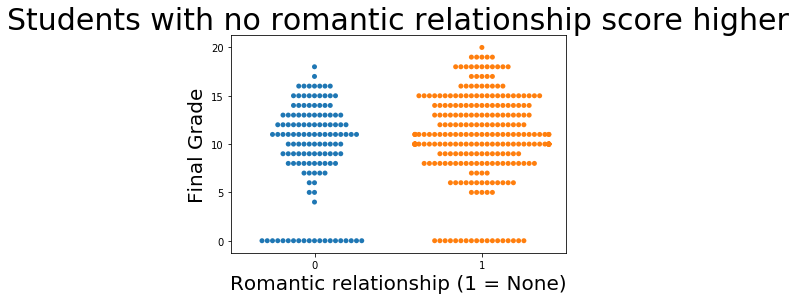

In [105]:
b = sns.swarmplot(x=student['romantic_no'],y=student['G3'])
b.axes.set_title('Students with no romantic relationship score higher', fontsize = 30)
b.set_xlabel('Romantic relationship (1 = None)', fontsize = 20)
b.set_ylabel('Final Grade', fontsize = 20)
plt.show()

# Modeling

### We can create a model in 3 ways

1. Binary classification
    - G3 > 10: pass
    - G3 < 10: fail
2. 5-level classification based on Erasmus grade conversion system
    - 16-20: very good
    - 14-15: good
    - 12-13: satisfactory
    - 10-11: sufficient
    -  0-9 : fail
3. Regression (Predicting G3)

### We will be using the 3rd type

In [106]:
# splitting the data into training and testing data (75% and 25%)
# we mention the random state to achieve the same split everytime we run the code
X_train, X_test, y_train, y_test = train_test_split(student, labels, test_size = 0.25, random_state=42)

In [107]:
X_train.head()

,G3,failures,Medu,higher_yes,age,Fedu,goout,romantic_no
16,14,0,4,1,16,4,3,1
66,12,0,4,1,15,4,3,0
211,13,0,4,1,17,4,5,0
7,6,0,4,1,17,4,4,1
19,10,0,4,1,16,3,3,1


### MAE - Mean Absolute Error
### RMSE - Root Mean Square Error

In [108]:
# Calculate mae and rmse
def evaluate_predictions(predictions, true):
    mae = np.mean(abs(predictions - true))
    rmse = np.sqrt(np.mean((predictions - true) ** 2))
    
    return mae, rmse

### Naive baseline is the median prediction

In [109]:
# find the median
median_pred = X_train['G3'].median()

# create a list with all values as median
median_preds = [median_pred for _ in range(len(X_test))]

# store the true G3 values for passing into the function
true = X_test['G3']

In [110]:
# Display the naive baseline metrics
mb_mae, mb_rmse = evaluate_predictions(median_preds, true)
print('Median Baseline  MAE: {:.4f}'.format(mb_mae))
print('Median Baseline RMSE: {:.4f}'.format(mb_rmse))

Median Baseline  MAE: 3.7879
Median Baseline RMSE: 4.8252


In [111]:
# Evaluate several ml models by training on training set and testing on testing set
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_recall_fscore_support, f1_score
from sklearn.metrics import classification_report
from sklearn import metrics

def evaluate(X_train, X_test, y_train, y_test):
    # Names of models
    model_name_list = ['Linear Regression', 'ElasticNet Regression',
                      'Random Forest', 'Extra Trees', 'SVM',
                       'Gradient Boosted', 'Baseline']
    X_train = X_train.drop('G3', axis='columns')
    X_test = X_test.drop('G3', axis='columns')
    
    # Instantiate the models
    model1 = LinearRegression()
    model2 = ElasticNet(alpha=1.0, l1_ratio=0.5)
    model3 = RandomForestRegressor(n_estimators=100)
    model4 = ExtraTreesRegressor(n_estimators=100)
    model5 = SVR(kernel='rbf', degree=3, C=1.0, gamma='auto')
    model6 = GradientBoostingRegressor(n_estimators=50)
    model17 = RandomForestClassifier(n_estimators=100)
    
    model17.fit(X_train, y_train)
  

    
    # Dataframe for results
    results = pd.DataFrame(columns=['mae', 'rmse'], index = model_name_list)
    
    # Train and predict with each model
    for i, model in enumerate([model1, model2, model3, model4, model5, model6]):
        model.fit(X_train, y_train)
        predictions = model.predict(X_test)
        print("##############")
        print(predictions)
        print("############")
        # Metrics
        mae = np.mean(abs(predictions - y_test))
        rmse = np.sqrt(np.mean((predictions - y_test) ** 2))
        
        # Insert results into the dataframe
        model_name = model_name_list[i]
        results.loc[model_name, :] = [mae, rmse]
        
    # Median Value Baseline Metrics
    baseline = np.median(y_train)
    baseline_mae = np.mean(abs(baseline - y_test))
    baseline_rmse = np.sqrt(np.mean((baseline - y_test) ** 2))
    
    results.loc['Baseline', :] = [baseline_mae, baseline_rmse]
    
    return results

In [112]:
results = evaluate(X_train, X_test, y_train, y_test)
results

##############
[ 5.22385164  7.50904943  8.74767887 10.60604712  6.87812994 11.01131602
 11.77111662 11.41242269 11.55056962 11.77111662 11.84344401 11.78679638
 12.41785693 12.6107516  11.13262888 10.36532129 10.06679352 10.78701553
  9.58794103 10.59337527 11.24944267 11.58197544 12.01184245 11.04197625
 12.72831098 13.26756458 10.48473426 11.96475688 10.93333524 13.92813106
  8.45030541 11.20495627 12.52084456 11.5636502  10.70903475 10.78453475
  7.61919658 12.18905737 12.93953088  8.12894427  6.43844732 11.5161559
 10.82960203  7.71100352 11.63672318 12.74589063 10.60720144  8.22600492
 10.20118696 11.5636502  12.15839713 12.72831098 12.18905737 11.459917
 10.72586882  9.96306031 10.89074874 10.38290095 13.58177212 12.60699811
 10.9045749  11.86102367  4.68946567 10.92140897  7.84725056 10.45448275
  8.71891854 10.47090809 10.84718168 12.62457777 11.9942628  11.5161559
 11.459917   11.77111662 10.76943587 11.668129   11.54566182 12.53351641
  5.78105347 10.70903475 10.67952883  3.

,mae,rmse
Linear Regression,3.51289,4.45104
ElasticNet Regression,3.61061,4.57647
Random Forest,3.73005,4.81822
Extra Trees,3.87812,5.043
SVM,3.58885,4.60437
Gradient Boosted,3.60464,4.48663
Baseline,3.78788,4.82523


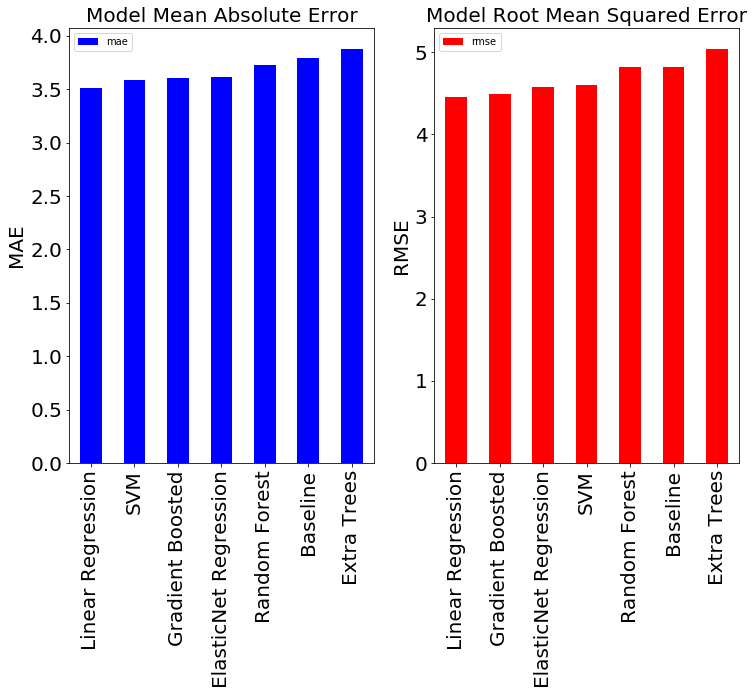

In [113]:
plt.figure(figsize=(12, 8))

# Root mean squared error
ax =  plt.subplot(1, 2, 1)
results.sort_values('mae', ascending = True).plot.bar(y = 'mae', color = 'b', ax = ax, fontsize=20)
plt.title('Model Mean Absolute Error', fontsize=20) 
plt.ylabel('MAE', fontsize=20)

# Median absolute percentage error
ax = plt.subplot(1, 2, 2)
results.sort_values('rmse', ascending = True).plot.bar(y = 'rmse', color = 'r', ax = ax, fontsize=20)
plt.title('Model Root Mean Squared Error', fontsize=20) 
plt.ylabel('RMSE',fontsize=20)

plt.show()

### We see that linear regression is performing the best in both cases